# Homework # 3 - K-Nearest Neighbor
Data file: social_network_ads.csv

### Import libraries

In [53]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [54]:
# Read CSV into dataframe
df = pd.read_csv('social_network_ads.csv')

In [55]:
# Display first few rows
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Drop unnecessary columns 'User ID' and 'Gender'

In [56]:
df.drop(columns = ['User ID', 'Gender'], inplace = True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Explore data

<AxesSubplot:xlabel='Age', ylabel='Count'>

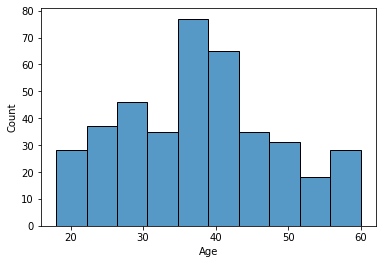

In [57]:
# Display distribution (min, max) of values for Age and EstimatedSalary variables
sns.histplot(data = df, x = 'Age')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

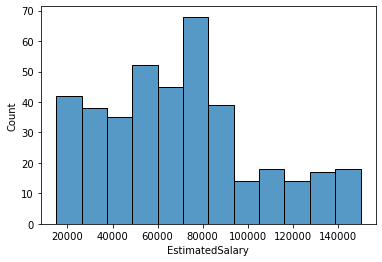

In [58]:
sns.histplot(data = df, x = 'EstimatedSalary')

#### Note the scale for column EstimatedSalary is much higher than for column Age

### Separate independent and dependent variables
* Independent variables: All except Purchased
* Dependent variable: Purchased

In [59]:
# Prepare data for training and testing
X = df.drop(columns = 'Purchased')
y = df['Purchased']

### Scale Age and EstimatedSalary variables

In [60]:
print("Before Standardization:")
print(X)
col_names = ['Age', 'EstimatedSalary']
features = X[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[col_names] = features
print("After Standardization:")
print(X)

Before Standardization:
     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
After Standardization:
          Age  EstimatedSalary
0   -1.781797        -1.490046
1   -0.253587        -1.460681
2   -1.113206        -0.785290
3   -1.017692        -0.374182
4   -1.781797         0.183751
..        ...              ...
395  0.797057        -0.844019
396  1.274623        -1.372587
397  1.179110        -1.460681
398 -0.158074        -1.078938
399  1.083596        -0.990844

[400 rows x 2 columns]


<AxesSubplot:xlabel='Age', ylabel='Count'>

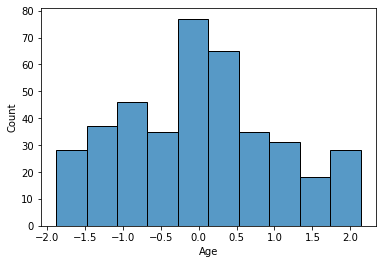

In [61]:
# Display distribution (min, max) of scaled values for Age and EstimatedSalary variables
sns.histplot(data = X, x = "Age")

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

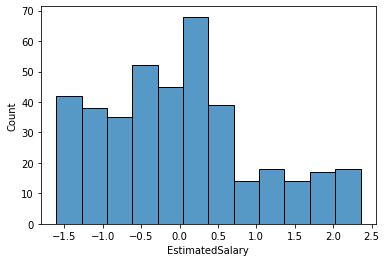

In [62]:
sns.histplot(data = X, x = "EstimatedSalary")

### Split data into training and test sets

In [63]:
# Split into training (70%) and test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Train KNeighborsClassifier (with default hyperparameters)

In [64]:
# Defaults: n_neighbors=5, weights='uniform' metric='Euclidean'
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

### Evaulate model performance

In [65]:
# Predict using the Test set results
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

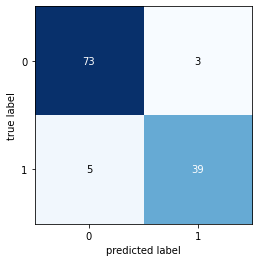

In [66]:
# Display the Confusion Matrix
#http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/#example-1-binary-classification
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [67]:
# Generate and print model performance metrics (accuracy) on test set
print("Accuracy of test set =", accuracy_score(y_test, y_pred)*100)

Accuracy of test set = 93.33333333333333


In [68]:
# Generate classification report to evaluate the model
pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.935897,0.928571,0.933333,0.932234,0.933211
recall,0.960526,0.886364,0.933333,0.923445,0.933333
f1-score,0.948052,0.906977,0.933333,0.927514,0.932991
support,76.000000,44.000000,0.933333,120.000000,120.000000


### Train KNeighborsClassifier (change hyperparameter: n_neighbors)

For K =  3
Accuracy Score:  0.8916666666666667
Confusion Matrix: 


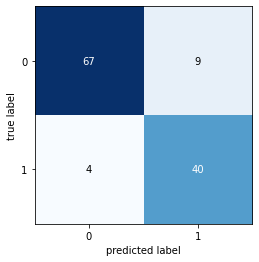

Classification Report: 
                   0          1  accuracy   macro avg  weighted avg
precision   0.943662   0.816327  0.891667    0.879994      0.896972
recall      0.881579   0.909091  0.891667    0.895335      0.891667
f1-score    0.911565   0.860215  0.891667    0.885890      0.892736
support    76.000000  44.000000  0.891667  120.000000    120.000000

---------------------------------------------------------------------------------

For K =  5
Accuracy Score:  0.9333333333333333
Confusion Matrix: 


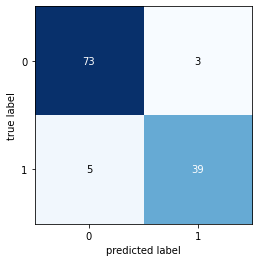

Classification Report: 
                   0          1  accuracy   macro avg  weighted avg
precision   0.935897   0.928571  0.933333    0.932234      0.933211
recall      0.960526   0.886364  0.933333    0.923445      0.933333
f1-score    0.948052   0.906977  0.933333    0.927514      0.932991
support    76.000000  44.000000  0.933333  120.000000    120.000000

---------------------------------------------------------------------------------

For K =  7
Accuracy Score:  0.9333333333333333
Confusion Matrix: 


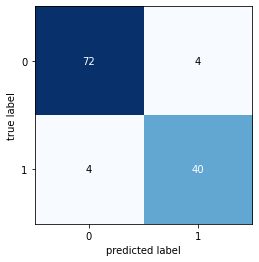

Classification Report: 
                   0          1  accuracy  macro avg  weighted avg
precision   0.947368   0.909091  0.933333    0.92823      0.933333
recall      0.947368   0.909091  0.933333    0.92823      0.933333
f1-score    0.947368   0.909091  0.933333    0.92823      0.933333
support    76.000000  44.000000  0.933333  120.00000    120.000000

---------------------------------------------------------------------------------

For K =  9
Accuracy Score:  0.925
Confusion Matrix: 


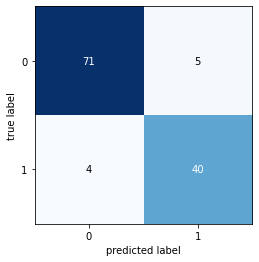

Classification Report: 
                   0          1  accuracy   macro avg  weighted avg
precision   0.946667   0.888889     0.925    0.917778      0.925481
recall      0.934211   0.909091     0.925    0.921651      0.925000
f1-score    0.940397   0.898876     0.925    0.919637      0.925173
support    76.000000  44.000000     0.925  120.000000    120.000000

---------------------------------------------------------------------------------

For K =  11
Accuracy Score:  0.9333333333333333
Confusion Matrix: 


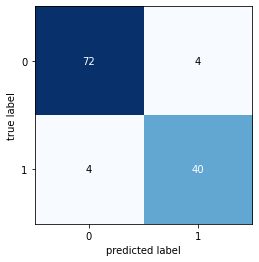

Classification Report: 
                   0          1  accuracy  macro avg  weighted avg
precision   0.947368   0.909091  0.933333    0.92823      0.933333
recall      0.947368   0.909091  0.933333    0.92823      0.933333
f1-score    0.947368   0.909091  0.933333    0.92823      0.933333
support    76.000000  44.000000  0.933333  120.00000    120.000000

---------------------------------------------------------------------------------



In [69]:
possible_k=[3,5,7,9,11]
ac_scores = []
for k in possible_k:
    knn=KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric="euclidean")
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores=accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
    print("For K = ", k)
    print("Accuracy Score: ", scores)
    print("Confusion Matrix: ")
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()
    print("Classification Report: ")
    print(pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)))
    print("")
    print("---------------------------------------------------------------------------------")
    print("")

In [70]:
#Calculate Error
MSE=[1-x for x in ac_scores]
print ("MSE : ", MSE)

MSE :  [0.10833333333333328, 0.06666666666666665, 0.06666666666666665, 0.07499999999999996, 0.06666666666666665]


#### Plot MSE Vs. K

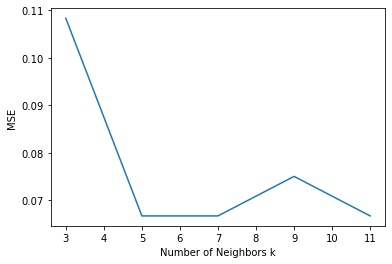

In [71]:
plt.plot(possible_k,MSE)
plt.xlabel("Number of Neighbors k")
plt.ylabel("MSE")
plt.show()